# Task 4: Stock Market & News Headline Prediction using Numerical and Textual Analysis

## Creating a hybrid model for stock price/performance prediction using
## numerical analysis of historical stock prices, and sentimental analysis
## of news headlines  

In [5]:
import numpy as np
import pandas as pd     #improting all the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


In [6]:
import pandas_datareader.data as web#using pandas reader for getting financial data
from pandas import Series, DataFrame

In [18]:

start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2020, 1, 11)

dq = web.DataReader("GOOG", 'yahoo', start, end)


In [19]:
dq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,154.919327,150.739990,151.532028,153.250580,5795100.0,153.250580
2009-01-02,160.309128,152.179596,153.723801,160.060059,7248000.0,160.060059
2009-01-05,165.001541,156.911850,159.900650,163.412491,9814500.0,163.412491
2009-01-06,169.763687,162.585587,165.868286,166.406265,12898500.0,166.406265
2009-01-07,164.837143,158.779861,163.546982,160.403763,9022600.0,160.403763


##  we perform  Stock Data analysis using two key measurements: Rolling Mean and Return Rate.

In [20]:
 close_px = dq['Adj Close']
moving_avg = close_px.rolling(window=100).mean()


In [21]:
moving_avg.head(30)

Date
2008-12-31   NaN
2009-01-02   NaN
2009-01-05   NaN
2009-01-06   NaN
2009-01-07   NaN
2009-01-08   NaN
2009-01-09   NaN
2009-01-12   NaN
2009-01-13   NaN
2009-01-14   NaN
2009-01-15   NaN
2009-01-16   NaN
2009-01-20   NaN
2009-01-21   NaN
2009-01-22   NaN
2009-01-23   NaN
2009-01-26   NaN
2009-01-27   NaN
2009-01-28   NaN
2009-01-29   NaN
2009-01-30   NaN
2009-02-02   NaN
2009-02-03   NaN
2009-02-04   NaN
2009-02-05   NaN
2009-02-06   NaN
2009-02-09   NaN
2009-02-10   NaN
2009-02-11   NaN
2009-02-12   NaN
Name: Adj Close, dtype: float64

In [22]:
import matplotlib as mp
from matplotlib import style

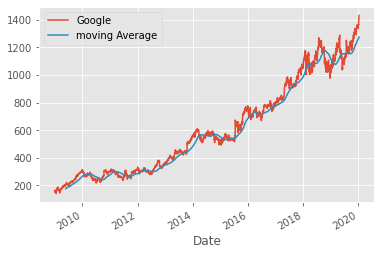

In [24]:
style.use('ggplot')

close_px.plot(label='Google')
moving_avg.plot(label='moving Average')
plt.legend()
plt.show()

#### What is moving average ?
#### The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price. In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn.

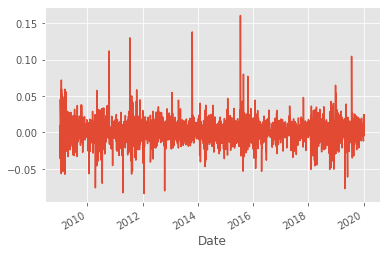

In [27]:
returns = close_px / close_px.shift(1) - 1
returns.plot(label='return')
plt.show()

### comparing with other compaines stocks

In [28]:

df_company = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2008-12-31,2.634081,10.671099,153.250580,58.248184,14.832603
2009-01-02,2.800736,11.244174,160.060059,60.469875,15.511667
2009-01-05,2.918938,10.954344,163.412491,60.089211,15.656638
2009-01-06,2.870794,11.105847,166.406265,61.757198,15.839754
2009-01-07,2.808761,10.611814,160.403763,60.760555,14.886011


In [29]:
df_company.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2008-12-31,2.634081,10.671099,153.250580,58.248184,14.832603
2009-01-02,2.800736,11.244174,160.060059,60.469875,15.511667
2009-01-05,2.918938,10.954344,163.412491,60.089211,15.656638
2009-01-06,2.870794,11.105847,166.406265,61.757198,15.839754
2009-01-07,2.808761,10.611814,160.403763,60.760555,14.886011


### Checking the correlation between different companies

In [37]:
returns_companies = df_company.pct_change()#percentge change
corr = returns_companies.corr()


### what is  Percentage change?
### Percentage change will find how much the price changes compared to the previous day which defines returns.

In [38]:
returns_companies.head(6)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.063269,0.053703,0.044434,0.038142,0.045782
2009-01-05,0.042204,-0.025776,0.020945,-0.006295,0.009346
2009-01-06,-0.016494,0.013830,0.018320,0.027759,0.011696
2009-01-07,-0.021608,-0.044484,-0.036071,-0.016138,-0.060212
2009-01-08,0.018569,0.001862,0.009875,-0.006949,0.031266


### computing  the correlation matrix
### Plotting a diagonal correlation matrice

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

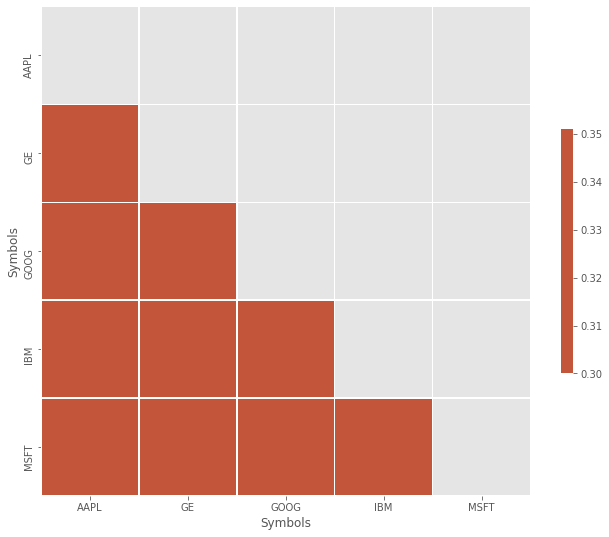

In [39]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Let us see the return rate and risk of the stocks

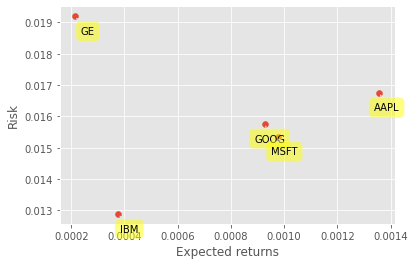

In [42]:
plt.scatter(returns_companies.mean(), returns_companies.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(returns_companies.columns, returns_companies.mean(), returns_companies.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Perfoming numerical analysis on 'India's News Headlines'

In [46]:
#loading the news data

dq1 = pd.read_csv('india-news-headlines.csv')


In [45]:
dq1.head(8)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi


In [47]:
dq1.tail(8)

,publish_date,headline_category,headline_text
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [54]:
dq1.isna().any()#checking the null values

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [48]:
dq1.info()#checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [50]:
dq1.describe()#checking the stats

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [53]:
#Number of news unique categories
dq1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

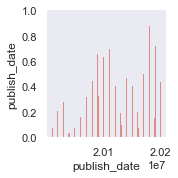

In [71]:
#plotting the data
sns.set_palette('hls')
sns.pairplot(dq1)
#plt.figure((12,12))
plt.show()

<AxesSubplot:>

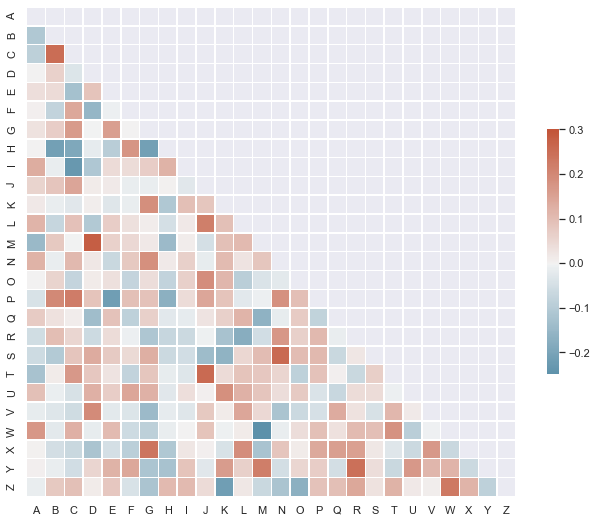

In [70]:
from string import ascii_letters
sns.set_theme(style="dark")

# Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr_1 = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_1, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [73]:

dq1['headline_text'].value_counts()

Sunny Leone HOT photos                                                                                       98
Watch top news in one-minute                                                                                 90
Official Site                                                                                                89
Football: Italian Serie A table                                                                              88
Football: Spanish La Liga table                                                                              86
                                                                                                             ..
BMC cracks down on Breach Candy hawkers                                                                       1
Nikki Galrani attends Comedy Stars                                                                            1
7 post offices in Pune region to become visitor-friendly                                                

In [76]:
dq1['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
ballot-talk                     7
delhi-ncr                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

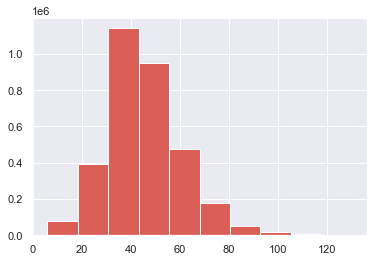

In [75]:
dq1['headline_text'].str.len().hist()
plt.show()

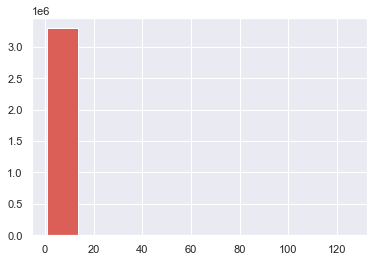

In [74]:
dq1['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

### using the nltk library to get the corpus containing stopwords

In [78]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [81]:

corpus=[]
news= dq1['headline_text'].str.split()
news=news.values.tolist()
corpus=[word for i in news for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

### using counter function for calculating the occurances of the word

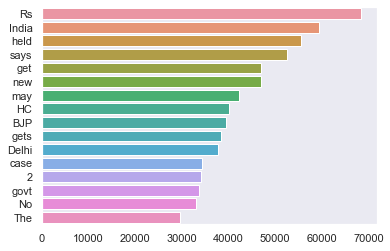

In [82]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

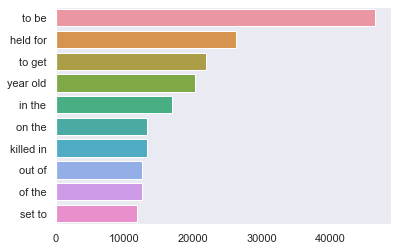

In [84]:
#using countVectorizer
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(dq1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

In [88]:
#using textblob

from textblob import TextBlob
TextBlob('Hyderabad hit with huge floods').sentiment

Sentiment(polarity=0.4000000000000001, subjectivity=0.9)

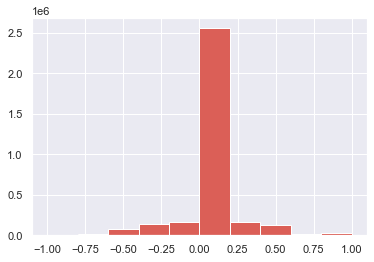

In [91]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
dq1['polarity_score']=dq1['headline_text'].\
   apply(lambda x : polarity(x))
dq1['polarity_score'].hist()
plt.show()

### The polarity mainly ranges between 0.00 and 0.20. This indicates that the majority of the news headlines are constant.Let’s look into deeper by classifying the news as negative, positive and neutral based on the scores

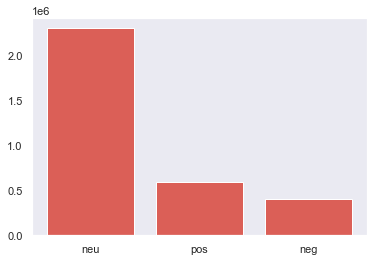

In [93]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
dq1['polarity']=dq1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(dq1.polarity.value_counts().index,
        dq1.polarity.value_counts())
plt.show()

### From the above graph we can say that 70 % of news is neutral with only  some are positive oand negative. Let’s take a look at some of the positive and negative headlines.

In [96]:
postive_headlines = dq1[dq1['polarity']=='pos']['headline_text'].head()


In [97]:

Negative_headlines = dq1[dq1['polarity']=='neg']['headline_text'].head()

In [99]:
print("positive_head_lines:",postive_headlines)

positive_head_lines: 0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object


In [101]:
print("negative_head_lines:",Negative_headlines)

negative_head_lines: 66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object
